In [1]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np

In [10]:
iris = load_iris()
X = iris.data
y = iris.target

In [11]:
iris.feature_names.extend(['target'])

In [20]:
import pandas as pd
pd.DataFrame(np.column_stack((X,y)), columns=iris.feature_names)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


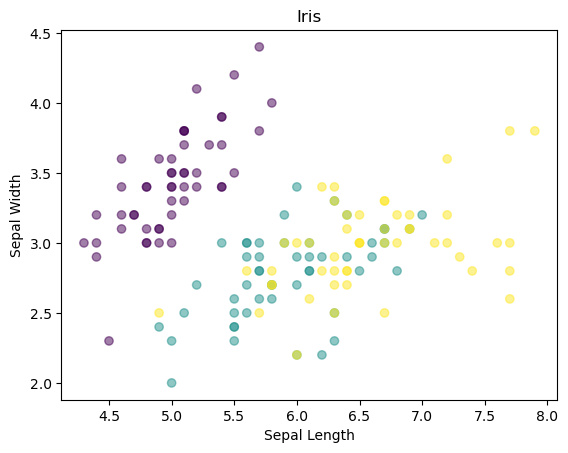

In [22]:
plt.scatter(X[:, 0], X[:,1], c=y, alpha=0.5)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Iris')
plt.show()

## Sklearn pipeline

In [86]:
# step 1
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [87]:
# step 2: instantiate the estimator
model = KNeighborsClassifier(n_neighbors=3)
print(model)

KNeighborsClassifier(n_neighbors=3)


In [88]:
# step 3: training the algorithm
model.fit(X,y)

KNeighborsClassifier(n_neighbors=3)

In [89]:
# Step 4: predict
y_pred = model.predict(X)

## visualise decision bounds

In [120]:
x_dim = 0
y_dim = 1

model_2D = KNeighborsClassifier(n_neighbors=5)
model_2D.fit(X[:, [x_dim, y_dim]], y)

KNeighborsClassifier()

In [121]:
# grid for decision bounds
x_min, x_max = X[:, x_dim].min() - 0.1, X[:, x_dim].max() + 0.1
y_min, y_max = X[:, y_dim].min() - 0.1, X[:, y_dim].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                    np.arange(y_min, y_max, 0.02))

In [122]:
coordinate_points = np.column_stack((xx.ravel(), yy.ravel()))

In [123]:
# make prediction for every point on grid
Z = model_2D.predict(coordinate_points)
Z = Z.reshape(xx.shape)

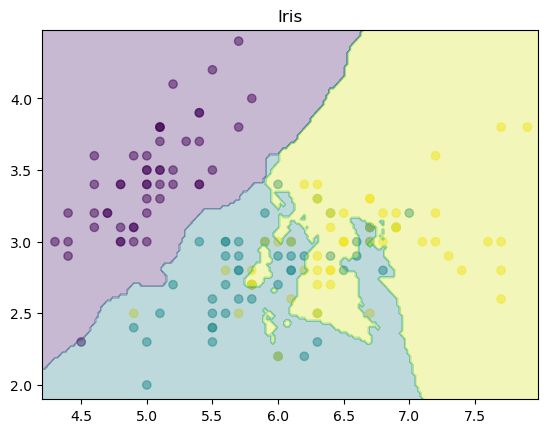

0.8333333333333334


In [124]:
plt.scatter(X[:, x_dim], X[:,y_dim], c=y, alpha=0.5)
plt.contourf(xx, yy, Z, alpha=0.3)


# plt.xlabel('Sepal Length')
# plt.ylabel('Sepal Width')
plt.title('Iris')
plt.show()

y_pred = model_2D.predict(X[:, [x_dim, y_dim]])
print(metrics.accuracy_score(y, y_pred))

# Model evaluation 4D

In [125]:
from sklearn import metrics

model = KNeighborsClassifier(n_neighbors=3)
model.fit(X,y)
y_pred = model.predict(X)
metrics.accuracy_score(y, y_pred)

0.96

### Train and Test split of data

In [150]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [151]:
X_train.shape

(90, 4)

In [152]:
y_train.shape

(90,)

In [153]:
scores = []
k_range = range(1, 25)
for k in k_range:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

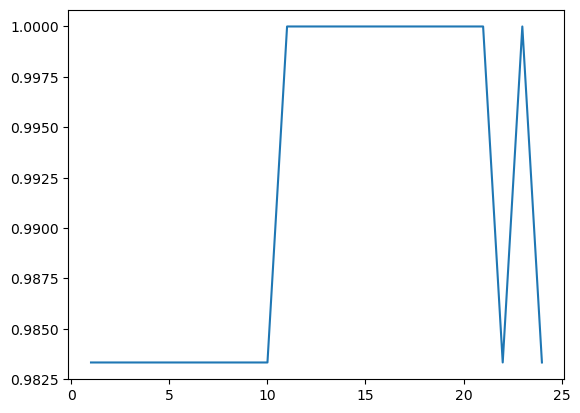

In [154]:
plt.plot(k_range, scores)

## Cross validation

In [155]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=False).split(range(25))

# print the contents of each training and testing set
print('{} {:^61} {}'.format('Iteration', 'Training set observations', 'Testing set observations'))
for iteration, data in enumerate(kf, start=1):
    print('{:^9} {} {:^25}'.format(iteration, data[0], str(data[1])))

Iteration                   Training set observations                   Testing set observations
    1     [ 5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]        [0 1 2 3 4]       
    2     [ 0  1  2  3  4 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]        [5 6 7 8 9]       
    3     [ 0  1  2  3  4  5  6  7  8  9 15 16 17 18 19 20 21 22 23 24]     [10 11 12 13 14]     
    4     [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 20 21 22 23 24]     [15 16 17 18 19]     
    5     [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]     [20 21 22 23 24]     


In [162]:
from sklearn.model_selection import cross_val_score

scores = []
k_range = range(1, 25)
for k in k_range:
    model = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(model, X, y, cv=10, scoring='accuracy').mean()
    scores.append(score)

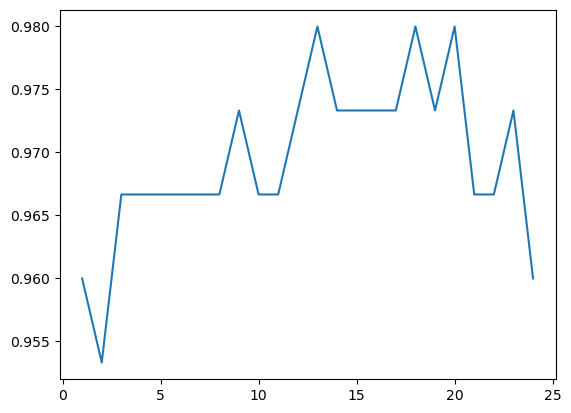

In [163]:
plt.plot(k_range, scores)